<a href="https://colab.research.google.com/github/labviros/computer-vision-topics/blob/version2020/lesson02-matplotlib/3d_2d_plots_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting in Matplotlib

In this notebook, we are going to see the basics for plotting in 3D and 2D graphics.

## Creating a 'axes' object

* To create two-dimensional plots you can use directly `matplotlib.pyplot`
* To create three-dimensional plots, just import the toolkit `mplot3d` and use the `projection='3d'`, as shown below.
* The `%matplotlib` is a "magic function", with wich the output of plotting commands is displayed directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.  It may be worth also reading  [How to make IPython notebook matplotlib plot inline ](https://stackoverflow.com/questions/19410042/how-to-make-ipython-notebook-matplotlib-plot-inline).

* For all Matplotlib plots, we start by creating a figure and an axes. In their simplest form, a figure and axes can be created as follows:

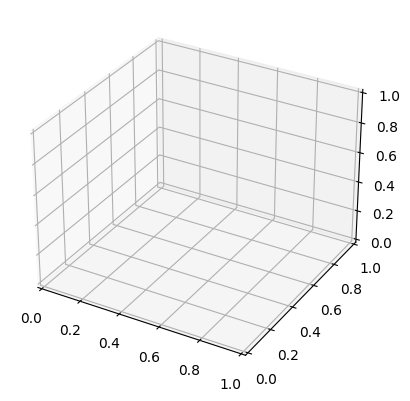

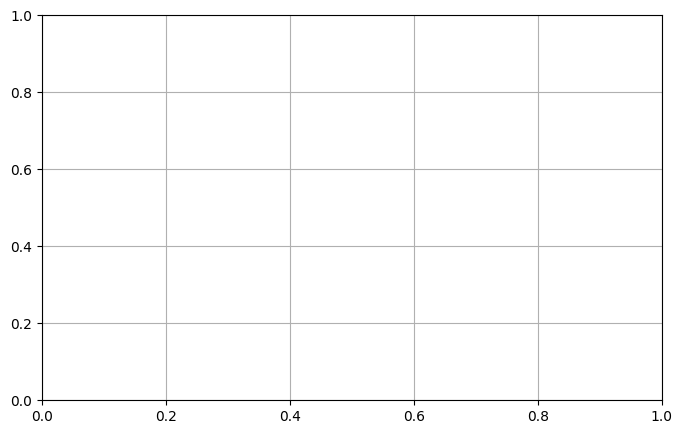

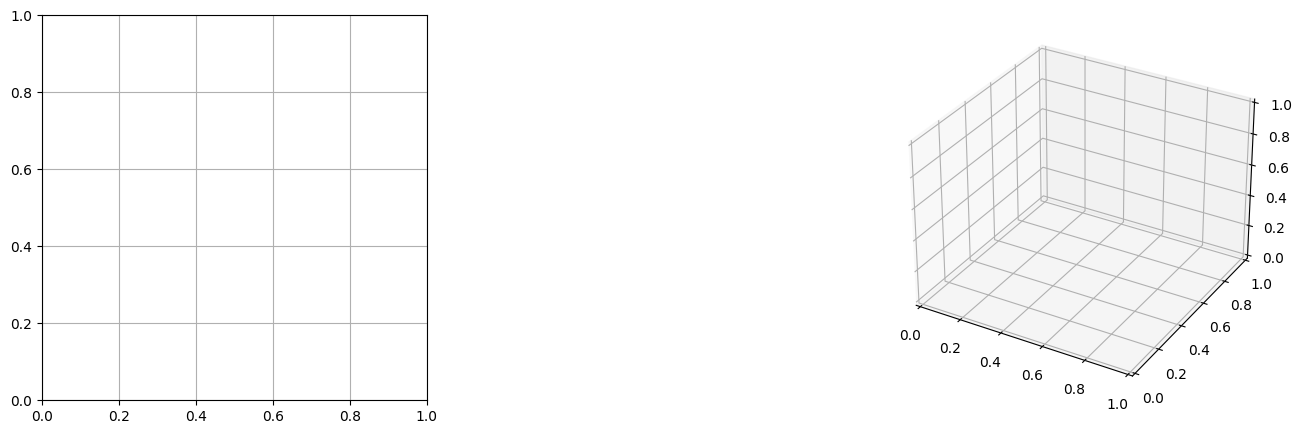

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

# Creating a separate 3D figure
fig = plt.figure()
ax0 = plt.axes(projection='3d')

# Creating a separate 2D figure
fig = plt.figure(figsize=[8,5])
ax0 = plt.axes()
ax0.grid()


# Creating subfigures
fig = plt.figure(figsize=[20,5])
ax1 = fig.add_subplot(1,2,1)
ax1.set_aspect('equal')
ax1.grid()
ax2 = fig.add_subplot(1,2,2, projection='3d')
#ax2.grid(False)


In Matplotlib, the *figure* can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels. The *axes* (an instance of the class `plt.Axes`) is what we see above: a 3D bounding box with ticks and labels, which will eventually contain the plot elements that make up our visualization.

It is inside this 3D axes that a plot can be drawn.

## 3D and 2D Points and Lines
* The most basic two-dimensional plot is a line or collection of scatter plot created from sets of (x, y) coordinates. These can be created using the `ax.plot` and `ax.scatter` functions.
* For the three-dimensional plot, it is usually created from sets of (x, y, z) triples. These can be created using the `ax.plot3D` and `ax.scatter3D` functions.
* The following image combines 2 plots, one with a line that goes through every point of the data, and other that draws a point on each of the particular 1000 values on this example.
*Note some functionalities to turn on and off grids and change the aspect of the graphs.


In [ ]:

#Complementary functions
import numpy as np
# Data for a three-dimensional line
# Array of z-coordinates
zline = np.linspace(0, 15, 1000)
# Array of x-coordinates calculated as the sine of z-values
xline = np.sin(zline)
# Array of y-coordinates calculated as the cosine of z-values
yline = np.cos(zline)

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)  # numpy.random.random returns random floats in the half-open interval [0.0, 1.0)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100) # numpy.random.randn returns a sample (or samples) from the “standard normal” distribution
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)


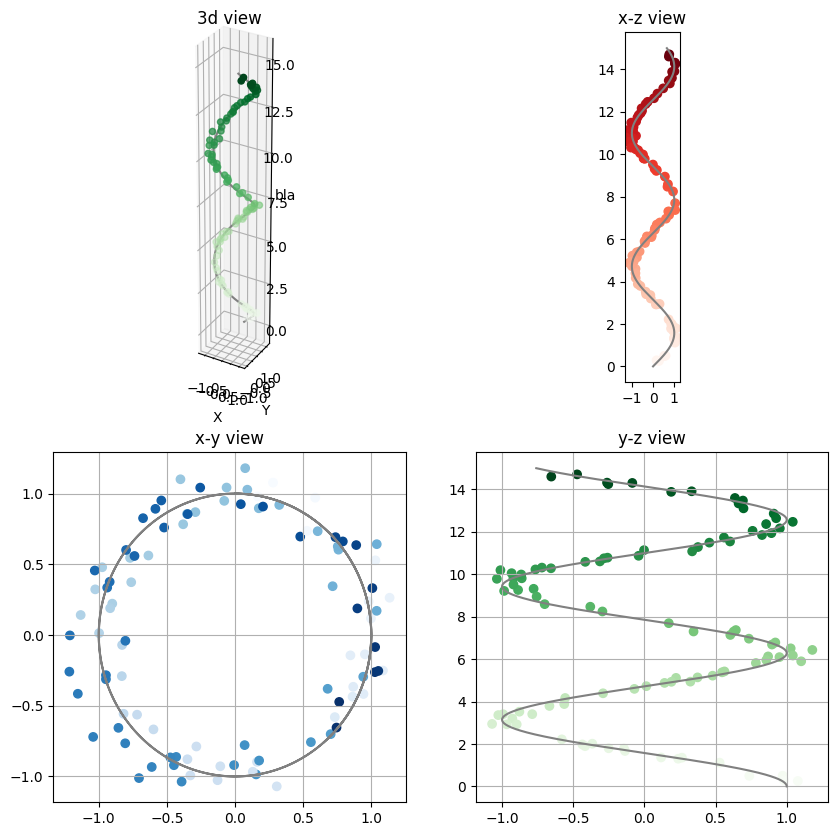

In [ ]:

fig = plt.figure(figsize=(10,10))

# 3D plot
ax1 = fig.add_subplot(2,2,1,projection='3d')
ax1.set_title("3d view")
ax1.plot3D(xline, yline, zline, 'gray')
ax1.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')
#ax1.plot3D(xdata, ydata, zdata, 'r.')
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("bla")
ax1.set_aspect('equal')

# 2D plot
ax2 = fig.add_subplot(2,2,2)
ax2.set_title("x-z view")
ax2.plot(xline,zline,'gray')
ax2.scatter(xdata,zdata,c=zdata,cmap='Reds')
ax2.set_aspect('equal')

# 2D plot
ax3 = fig.add_subplot(2,2,3)
ax3.set_title("x-y view")
ax3.plot(xline,yline,'gray')
ax3.scatter(xdata,ydata,c=zdata,cmap='Blues')
ax3.grid()

# 2D plot
ax4 = fig.add_subplot(2,2,4)
ax4.set_title("y-z view")
ax4.plot(yline,zline,'gray')
ax4.scatter(ydata,zdata,c=zdata,cmap='Greens')
ax4.grid()
#ax4.set_aspect('equal')
#ax4.set_xlim([1,-1])
plt.show()


##Ploting Vectors

* To plot vectors the function `ax.quiver` is usually used
* It can be used with 2D or 3D plots

X:
 [-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]
Y:
 [-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]


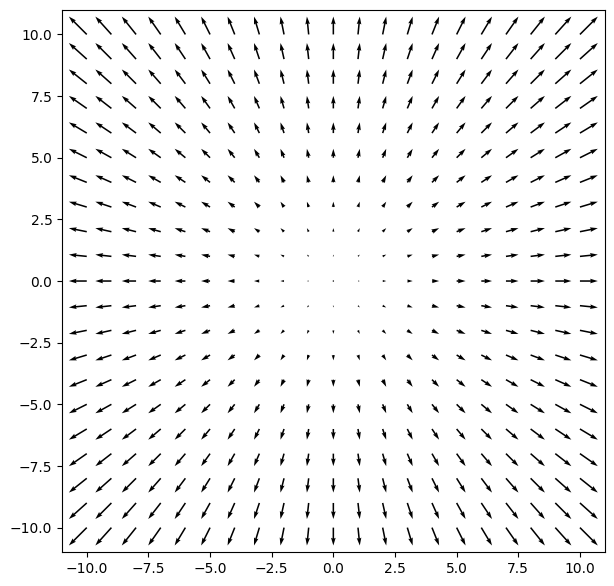

In [ ]:
X = np.arange(-10, 11, 1)
Y = np.arange(-10, 11, 1)
U, V = np.meshgrid(X, Y)

print('X:\n',X)
print('Y:\n',Y)
#print('U:\n',U)


fig = plt.figure(figsize=(7,10))
ax = fig.add_subplot()
q = ax.quiver(X, Y, U, V)
ax.set_aspect('equal')

plt.show()

Origin:
 [[0]
 [0]
 [0]]
Axis X:
 [[1]
 [0]
 [0]]
Repeated Origin:
 [[0 0 0]
 [0 0 0]
 [0 0 0]]
Reference Frame:
 [[1 0 0]
 [0 1 0]
 [0 0 1]]


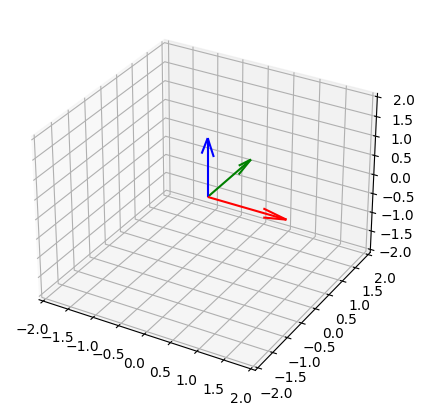

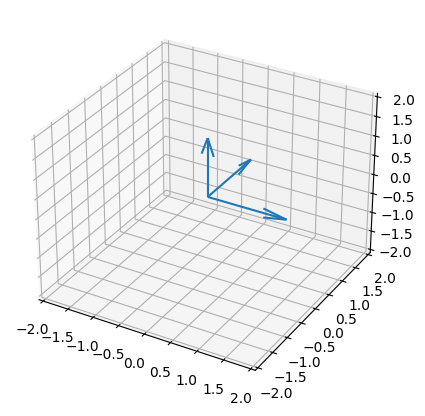

In [ ]:
fig_quivers = plt.figure(figsize=(5,5))
ax0 = plt.axes(projection='3d')
ax0.set_xlim([-2,2])
ax0.set_ylim([-2,2])
ax0.set_zlim([-2,2])
#origin point
point =np.array([[0],[0],[0]])

#base vector values
e1 = np.array([[1],[0],[0]]) # X
e2 = np.array([[0],[1],[0]]) # Y
e3 = np.array([[0],[0],[1]]) # Z

print('Origin:\n', point)
print('Axis X:\n',e1)

ax0.quiver(point[0],point[1],point[2],e1[0],e1[1],e1[2],color='red',pivot='tail',  length=1.5)
ax0.quiver(point[0],point[1],point[2],e2[0],e2[1],e2[2],color='green',pivot='tail',  length=1.5)
ax0.quiver(point[0],point[1],point[2],e3[0],e3[1],e3[2],color='blue',pivot='tail',  length=1.5)

# Another way to plot the axes, but all with the same color

# Stacking the origin and the axis in matrices
points = np.hstack((point,point,point))
base = np.hstack((e1,e2,e3))

print('Repeated Origin:\n',points)
print('Reference Frame:\n',base)

fig_quivers = plt.figure(figsize=(5,5))
ax1 = plt.axes(projection='3d')
ax1.set_xlim([-2,2])
ax1.set_ylim([-2,2])
ax1.set_zlim([-2,2])

ax1.quiver(points[0,:],points[1,:],point[2,:],base[0,:],base[1,:],base[2,:],length=1.5)